# Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pointbiserialr, spearmanr
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#===>A fixed-rate mortgage charges a set rate of interest that does not change throughout the life of the loan.
#===>The initial interest rate on an adjustable-rate mortgage (ARM) is set below the market rate on a comparable 
#fixed-rate loan, and then the rate rises (or possibly lowers) as time goes on.
#===>A jumbo loan is a type of financing that exceeds the limits set by the Federal Housing Finance Agency and 
#cannot be purchased, guaranteed, or securitized by Fannie Mae or Freddie Mac.

In [3]:
#The minimum credit score to qualify for a personal loan is typically 610 to 640, according to an anonymized 
#dataset of NerdWallet users who pre-qualified for personal loans.

In [4]:
#LoanTerm -> kohezgjatja ne muaj e Loan

# Read the data

In [5]:
# read the file
df = pd.read_csv('customer-loans.csv')
df.head()

,custid,Income,CreditScore,Debt,Date,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType,LoanStatus
0,92886957,43415,658,23878.25,2017-09-01,180,0.036,3,179930.0,71972.0,Government_insured,Approved
1,16462625,564164,786,5641.64,2019-09-13,480,0.038,5,386400.0,38640.0,Fixed_rate,Approved
2,89457436,466344,676,233172.00,2018-06-05,180,0.037,4,375840.0,75168.0,Government_insured,Approved
3,68462543,756171,694,378085.50,2018-04-26,180,0.036,2,675540.0,67554.0,Government_insured,Approved
4,63315493,58948,688,30063.48,2017-06-08,420,0.035,0,731690.0,146338.0,Government_insured,Approved


# Overview

In [6]:
# overview before cleaning
# axis=0 -> generate for each column
df_before = pd.DataFrame(index=df.columns)
df_before['Datatypes'] = df.dtypes
df_before['Unique'] = df.nunique()
df_before['Max'] = df.max(axis=0)
df_before['Min'] = df.min(axis=0)
df_before['Total'] = df.count(axis=0)
df_before['mean'] = df.median()
df_before['MissingValues'] = df.isnull().any()
df_before['MissingValuesTotal'] = df.isnull().sum()
df_before

,Datatypes,Unique,Max,Min,Total,mean,MissingValues,MissingValuesTotal
custid,int64,48303,99999810,2684,48427,50033737.00,False,0
Income,int64,40138,949942,10000,48427,48407.00,False,0
CreditScore,int64,180,799,620,48427,667.00,False,0
Debt,float64,47475,924100,0,48427,22052.25,False,0
Date,object,1000,2019-11-26,2017-03-02,48427,NaN,False,0
LoanTerm,int64,4,480,180,48427,420.00,False,0
InterestRate,float64,11,0.045,0.035,48427,0.04,False,0
CreditIncidents,int64,7,6,0,48427,2.00,False,0
HomeValue,float64,2328,3e+06,72900,48427,416150.00,False,0
LoanAmount,float64,13765,2.7e+06,8262,48427,193320.00,False,0


In [7]:
df.ProductType.unique()

array(['Government_insured', 'Fixed_rate', 'Adjustable_rate', 'Jumbo'],
      dtype=object)

In [8]:
df.loc[df.LoanStatus == 'Approved']

,custid,Income,CreditScore,Debt,Date,LoanTerm,InterestRate,CreditIncidents,HomeValue,LoanAmount,ProductType,LoanStatus
0,92886957,43415,658,23878.25,2017-09-01,180,0.036,3,179930.0,71972.0,Government_insured,Approved
1,16462625,564164,786,5641.64,2019-09-13,480,0.038,5,386400.0,38640.0,Fixed_rate,Approved
2,89457436,466344,676,233172.00,2018-06-05,180,0.037,4,375840.0,75168.0,Government_insured,Approved
3,68462543,756171,694,378085.50,2018-04-26,180,0.036,2,675540.0,67554.0,Government_insured,Approved
4,63315493,58948,688,30063.48,2017-06-08,420,0.035,0,731690.0,146338.0,Government_insured,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...
48418,26373256,27174,667,14673.96,2018-08-26,480,0.038,4,654670.0,261868.0,Adjustable_rate,Approved
48419,88108360,15493,782,1859.16,2018-05-02,360,0.043,3,605700.0,242280.0,Fixed_rate,Approved
48420,98038848,59557,664,32160.78,2018-10-13,180,0.044,2,627000.0,438900.0,Adjustable_rate,Approved
48421,90503375,26287,656,10777.67,2018-07-18,480,0.042,3,561600.0,224640.0,Fixed_rate,Approved


# Distribution of the variables (histogram)

This column Date can not be represented as a histogram
This column ProductType can not be represented as a histogram
This column LoanStatus can not be represented as a histogram


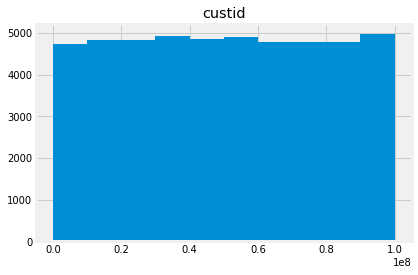

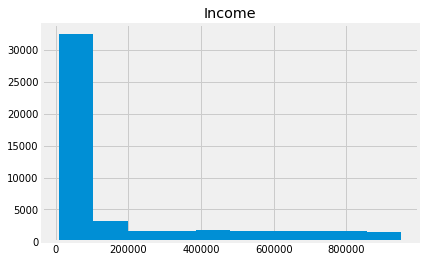

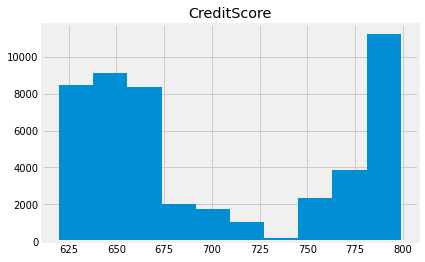

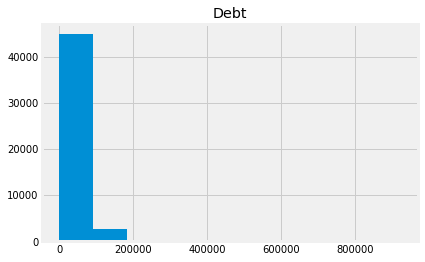

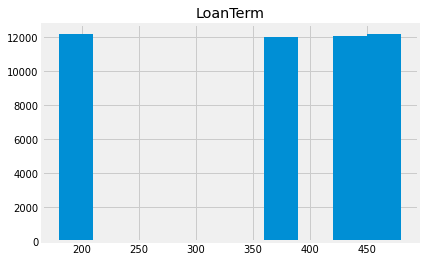

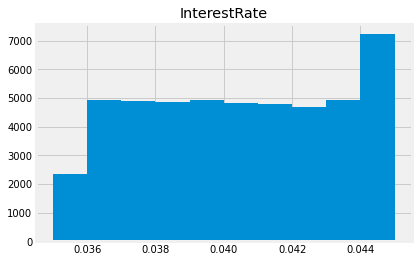

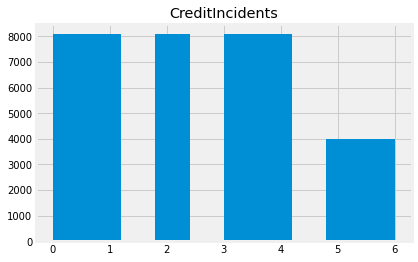

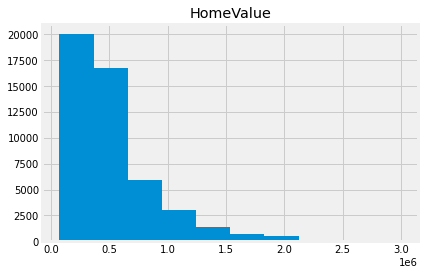

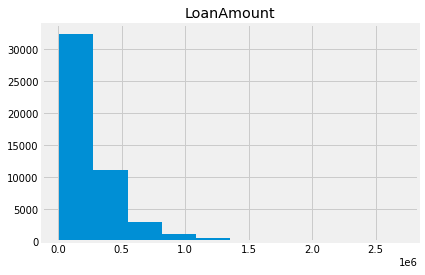

In [9]:
for col in df.columns: 
    try:      
        df[col] = pd.to_numeric(df[col]) 
        df.hist(column=col)
    except ValueError:
        print('This column '+col+' can not be represented as a histogram')

#  Categorial to number and drop columns

In [10]:
df.dtypes

custid               int64
Income               int64
CreditScore          int64
Debt               float64
Date                object
LoanTerm             int64
InterestRate       float64
CreditIncidents      int64
HomeValue          float64
LoanAmount         float64
ProductType         object
LoanStatus          object
dtype: object

In [11]:
df_model = df

In [12]:
df_model['ProductType'] = df_model['ProductType'].astype('category')
df_model['LoanStatus'] = df_model['LoanStatus'].astype('category')

In [13]:
df_model.ProductType = df_model['ProductType'].cat.codes
df_model.LoanStatus = df_model['LoanStatus'].cat.codes

In [14]:
df_model = df_model.drop(['custid', 'Date'], axis=1)

In [15]:
df_model.dtypes

Income               int64
CreditScore          int64
Debt               float64
LoanTerm             int64
InterestRate       float64
CreditIncidents      int64
HomeValue          float64
LoanAmount         float64
ProductType           int8
LoanStatus            int8
dtype: object

# Check the correlation

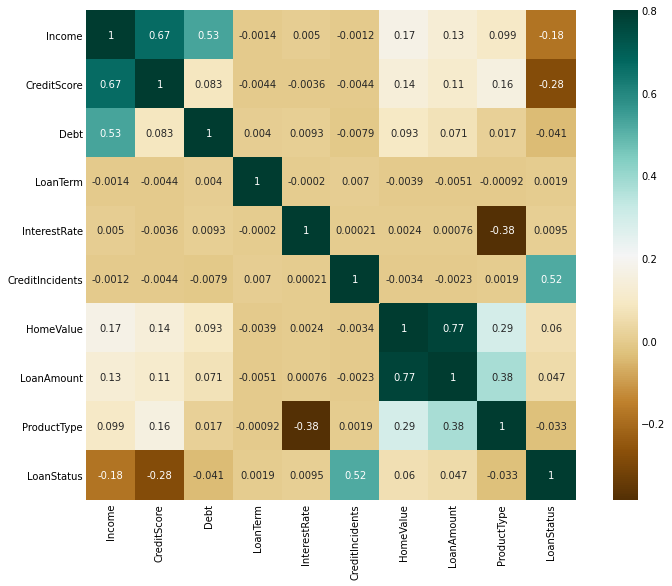

In [16]:
hmap = df_model.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

# Splitting the Data

In [17]:
df_model = df_model[['LoanStatus', 'Income', 'CreditScore', 'Debt', 'LoanTerm','InterestRate','CreditIncidents'
                     ,'HomeValue','LoanAmount','ProductType']]

In [18]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df_model,test_size=0.3,random_state=0,stratify=df_model['LoanStatus'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=df_model[df_model.columns[1:]]
Y=df_model['LoanStatus']

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_scaled_X = sc.fit_transform(train_X)
test_scaled_X = sc.transform(test_X)

In [20]:
print("Train slaced data X")
print(train_scaled_X)
print("Train data Y")
print(train_Y)
print("Test slaced data X")
print(test_scaled_X)
print("Test data Y")
print(test_Y)

Train slaced data X
[[ 2.71304117  1.30589861  1.2765923  ...  2.01285206  1.03612624
   1.32012221]
 [-0.15653712  1.10531857  0.05056331 ... -0.62866259 -0.72172418
  -1.16051764]
 [ 1.31211368  1.41390325 -0.09402016 ...  1.26187443 -0.6653333
  -1.16051764]
 ...
 [-0.51695013 -0.11359089 -0.25250267 ...  0.93647007  1.09071412
   0.07980228]
 [-0.4875512   0.50357846 -0.44637956 ...  1.86888226  2.97067953
   2.56044213]
 [-0.60379659 -0.85419412 -0.32326154 ... -0.26358503 -0.37668082
   0.07980228]]
Train data Y
       LoanStatus
6734            0
21379           0
19550           0
33630           0
12674           0
...           ...
44126           0
15548           0
28051           0
177             0
47764           0

[33898 rows x 1 columns]
Test slaced data X
[[-0.63708649 -0.69990178 -0.45840333 ... -0.65500623 -0.61960544
   0.07980228]
 [-0.52363933 -0.77704795 -0.20876589 ... -0.50843361 -0.66576161
   1.32012221]
 [ 2.57976056  1.46019095  1.62127118 ... -0.59174996

# SVM

In [21]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_scaled_X, train_Y)
prediction1 = svclassifier.predict(test_scaled_X)
print('Accuracy for linear SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for linear SVM is  0.9047422396586138


In [22]:
svclassifier = SVC(kernel='rbf', degree=8)
svclassifier.fit(train_scaled_X, train_Y)
prediction2 = svclassifier.predict(test_scaled_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction2,test_Y))

Accuracy for rbf SVM is  0.933099318604171


# Naïve baies

In [23]:
model=GaussianNB()
model.fit(train_scaled_X,train_Y)
prediction3=model.predict(test_scaled_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the NaiveBayes is 0.8727372840525844


In [24]:
# GaussianNB_result = test_Y
# GaussianNB_result['prediction'] = pd.Series(prediction3, index=GaussianNB_result.index)
# GaussianNB_result.loc[GaussianNB_result.LoanStatus != GaussianNB_result.prediction]

# Logistic regression

In [25]:
model = LogisticRegression()
model.fit(train_scaled_X,train_Y)
prediction4=model.predict(test_scaled_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Logistic Regression is 0.8948310275999725


#  Decision tree


In [26]:
model=DecisionTreeClassifier()
model.fit(train_scaled_X,train_Y)
prediction5=model.predict(test_scaled_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the Decision Tree is 0.9390185146947484


# Random Forest

In [27]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_scaled_X,train_Y)
prediction6=model.predict(test_scaled_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the Random Forests is 0.950788079014385


# XGBClassifier

In [28]:
model = XGBClassifier()
model.fit(train_scaled_X,train_Y)
prediction7 = model.predict(test_scaled_X)
print('The accuracy of the XGBClassifier is ', metrics.accuracy_score(prediction7,test_Y))

[11:22:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of the XGBClassifier is  0.9573267258586275


In [29]:
matrix = confusion_matrix(test_Y, prediction7)
# matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

In [30]:
matrix

array([[11076,   212],
       [  408,  2833]])

<AxesSubplot:>

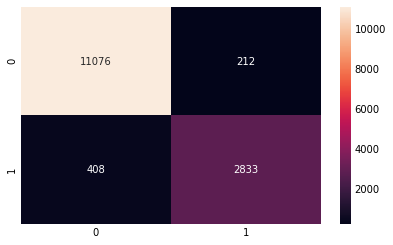

In [31]:
sns.heatmap(matrix,annot=True, fmt="d")